<a href="https://colab.research.google.com/github/Zaicevvv/GoIT-DSandML-Private/blob/main/HW14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cтворимо рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb. Поекспериментуємо з будовою мережі - RNN, LSTM, двостороння та глибока.**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

Завантажимо дані

In [2]:
max_features = 10000
maxlen = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

17464789/17464789 [==============================] - 1s 0us/step


Функція для відображення графіків

In [3]:
def plot_history(history, title):
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Визначимо загальну функцію для тренування, тестування та оцінки моделі

In [4]:
def train_and_evaluate_model(model, title):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.2, callbacks=[early_stopping])
    test_loss, test_acc = model.evaluate(X_test, y_test)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    plot_history(history, title)
    print(f"test_acc of {title}: {test_acc}")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Побудуємо різні моделі

In [5]:
rnn_model = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

lstm_model = Sequential([
    Embedding(max_features, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

bidirectional_rnn_model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(SimpleRNN(32)),
    Dense(1, activation='sigmoid')
])

bidirectional_lstm_model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

deep_rnn_model = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32, return_sequences=True),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

deep_lstm_model = Sequential([
    Embedding(max_features, 32),
    LSTM(32, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

Навчимо та оцінимо моделі

Epoch 1/15
625/625 [==============================] - 300s 474ms/step - loss: 0.5555 - accuracy: 0.7056 - val_loss: 0.5289 - val_accuracy: 0.7584
Epoch 2/15
625/625 [==============================] - 262s 419ms/step - loss: 0.3736 - accuracy: 0.8401 - val_loss: 0.5827 - val_accuracy: 0.6746
Epoch 3/15
625/625 [==============================] - 249s 399ms/step - loss: 0.2580 - accuracy: 0.8979 - val_loss: 0.4881 - val_accuracy: 0.7942
Epoch 4/15
625/625 [==============================] - 252s 403ms/step - loss: 0.1721 - accuracy: 0.9356 - val_loss: 0.4953 - val_accuracy: 0.8162
Epoch 5/15
625/625 [==============================] - 246s 394ms/step - loss: 0.0910 - accuracy: 0.9685 - val_loss: 0.6216 - val_accuracy: 0.7944
Epoch 6/15
782/782 [==============================] - 33s 42ms/step


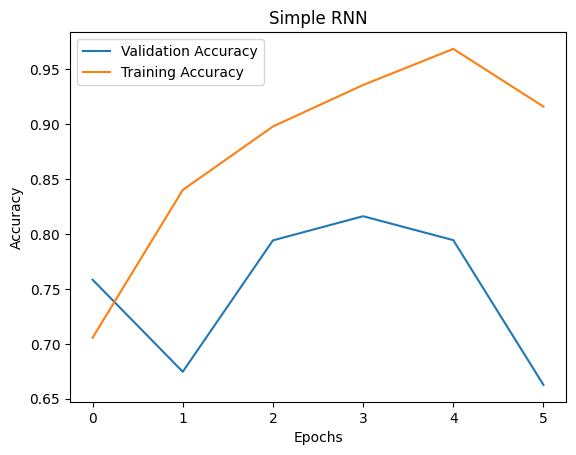

test_acc of Simple RNN: 0.7924399971961975
              precision    recall  f1-score   support

    Negative       0.83      0.73      0.78     12500
    Positive       0.76      0.85      0.80     12500

    accuracy                           0.79     25000
   macro avg       0.80      0.79      0.79     25000
weighted avg       0.80      0.79      0.79     25000

Epoch 1/15
625/625 [==============================] - 53s 80ms/step - loss: 0.4478 - accuracy: 0.7837 - val_loss: 0.3554 - val_accuracy: 0.8530
Epoch 2/15
625/625 [==============================] - 25s 40ms/step - loss: 0.2537 - accuracy: 0.9021 - val_loss: 0.2963 - val_accuracy: 0.8796
Epoch 3/15
625/625 [==============================] - 21s 33ms/step - loss: 0.1968 - accuracy: 0.9255 - val_loss: 0.3428 - val_accuracy: 0.8556
Epoch 4/15
625/625 [==============================] - 19s 30ms/step - loss: 0.1404 - accuracy: 0.9503 - val_loss: 0.3707 - val_accuracy: 0.8638
Epoch 5/15
782/782 [==============================] - 

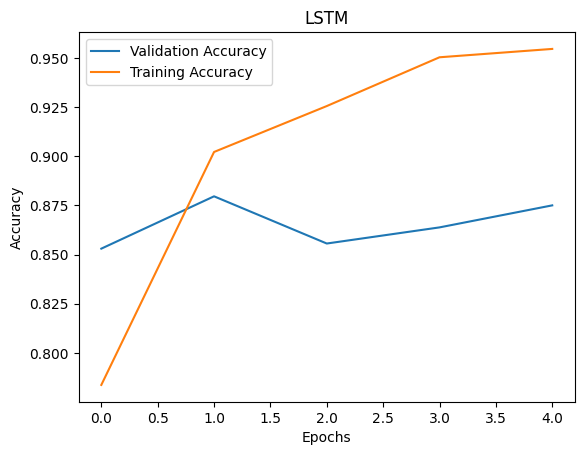

test_acc of LSTM: 0.8724799752235413
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87     12500
    Positive       0.87      0.88      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

Epoch 1/15
625/625 [==============================] - 468s 745ms/step - loss: 0.5539 - accuracy: 0.7049 - val_loss: 0.6677 - val_accuracy: 0.6540
Epoch 2/15
625/625 [==============================] - 462s 739ms/step - loss: 0.3807 - accuracy: 0.8324 - val_loss: 0.3702 - val_accuracy: 0.8458
Epoch 3/15
625/625 [==============================] - 459s 734ms/step - loss: 0.2719 - accuracy: 0.8928 - val_loss: 0.4073 - val_accuracy: 0.8280
Epoch 4/15
625/625 [==============================] - 451s 722ms/step - loss: 0.1948 - accuracy: 0.9259 - val_loss: 0.4345 - val_accuracy: 0.8364
Epoch 5/15
782/782 [==============================] 

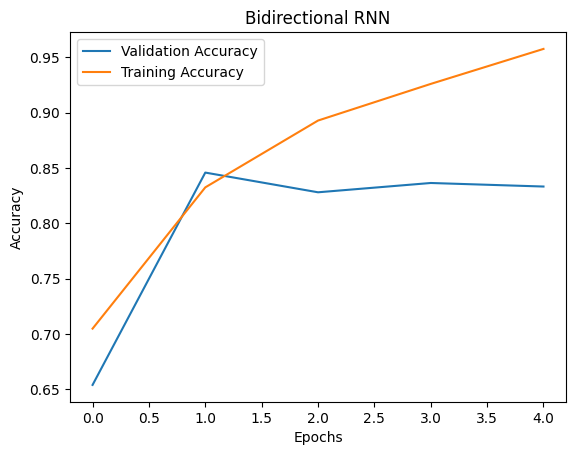

test_acc of Bidirectional RNN: 0.8410800099372864
              precision    recall  f1-score   support

    Negative       0.88      0.79      0.83     12500
    Positive       0.81      0.89      0.85     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

Epoch 1/15
625/625 [==============================] - 69s 105ms/step - loss: 0.4427 - accuracy: 0.7842 - val_loss: 0.3825 - val_accuracy: 0.8252
Epoch 2/15
625/625 [==============================] - 38s 61ms/step - loss: 0.2557 - accuracy: 0.8997 - val_loss: 0.3375 - val_accuracy: 0.8544
Epoch 3/15
625/625 [==============================] - 32s 50ms/step - loss: 0.1878 - accuracy: 0.9307 - val_loss: 0.2999 - val_accuracy: 0.8788
Epoch 4/15
625/625 [==============================] - 28s 45ms/step - loss: 0.1459 - accuracy: 0.9484 - val_loss: 0.3579 - val_accuracy: 0.8566
Epoch 5/15
625/625 [==========================

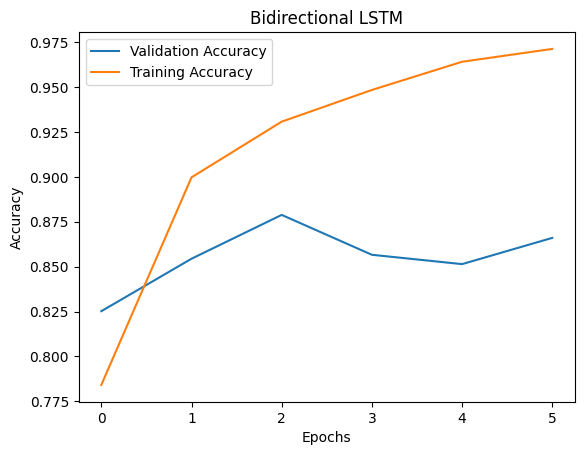

test_acc of Bidirectional LSTM: 0.8715199828147888
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87     12500
    Positive       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

Epoch 1/15
625/625 [==============================] - 531s 846ms/step - loss: 0.5436 - accuracy: 0.7106 - val_loss: 0.4782 - val_accuracy: 0.7862
Epoch 2/15
625/625 [==============================] - 614s 983ms/step - loss: 0.4462 - accuracy: 0.7908 - val_loss: 0.5672 - val_accuracy: 0.7040
Epoch 3/15
625/625 [==============================] - 602s 964ms/step - loss: 0.3639 - accuracy: 0.8433 - val_loss: 0.6045 - val_accuracy: 0.7040
Epoch 4/15
782/782 [==============================] - 77s 98ms/step


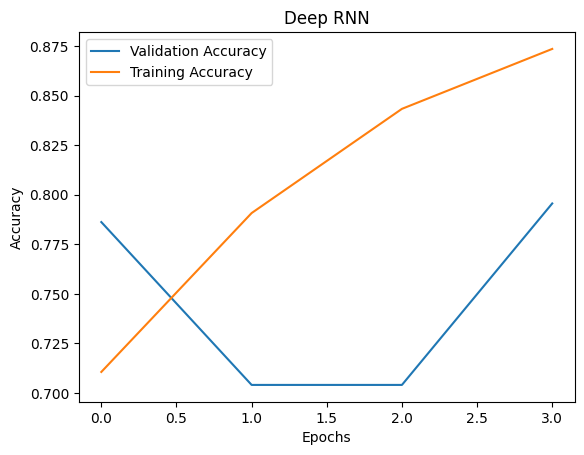

test_acc of Deep RNN: 0.7835599780082703
              precision    recall  f1-score   support

    Negative       0.82      0.73      0.77     12500
    Positive       0.76      0.84      0.79     12500

    accuracy                           0.78     25000
   macro avg       0.79      0.78      0.78     25000
weighted avg       0.79      0.78      0.78     25000

Epoch 1/15
625/625 [==============================] - 64s 97ms/step - loss: 0.4034 - accuracy: 0.8112 - val_loss: 0.3113 - val_accuracy: 0.8830
Epoch 2/15
625/625 [==============================] - 38s 61ms/step - loss: 0.2386 - accuracy: 0.9119 - val_loss: 0.2891 - val_accuracy: 0.8850
Epoch 3/15
625/625 [==============================] - 42s 67ms/step - loss: 0.1721 - accuracy: 0.9373 - val_loss: 0.3476 - val_accuracy: 0.8764
Epoch 4/15
625/625 [==============================] - 42s 68ms/step - loss: 0.1414 - accuracy: 0.9480 - val_loss: 0.3550 - val_accuracy: 0.8770
Epoch 5/15
782/782 [==============================] - 14

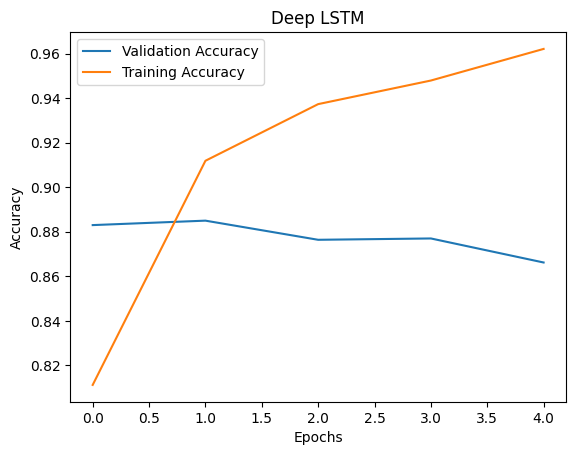

test_acc of Deep LSTM: 0.8756800293922424
              precision    recall  f1-score   support

    Negative       0.87      0.88      0.88     12500
    Positive       0.88      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [6]:
models = [rnn_model, lstm_model, bidirectional_rnn_model, bidirectional_lstm_model, deep_rnn_model, deep_lstm_model]
titles = ['Simple RNN', 'LSTM', 'Bidirectional RNN', 'Bidirectional LSTM', 'Deep RNN', 'Deep LSTM']

for i, model in enumerate(models):
    train_and_evaluate_model(model, titles[i])

Порівняймо результати та зробимо висновки:  

**Simple RNN:**  

Точність: 79.24%  
Класифікаційний звіт:  

              precision    recall  f1-score   support
    Negative       0.83      0.73      0.78     12500
    Positive       0.76      0.85      0.80     12500

    accuracy                           0.79     25000
    macro avg      0.80      0.79      0.79     25000
    weighted avg   0.80      0.79      0.79     25000
**LSTM:**

Точність: 87.24%  
Класифікаційний звіт:               

              precision    recall  f1-score   support
    Negative       0.87      0.87      0.87     12500
    Positive       0.87      0.88      0.87     12500

    accuracy                           0.87     25000
    macro avg      0.87      0.87      0.87     25000
    weighted avg   0.87      0.87      0.87     25000
**Bidirectional RNN:**  

Точність: 84.10%  
Класифікаційний звіт:  

              precision    recall  f1-score   support
    Negative       0.88      0.79      0.83     12500
    Positive       0.81      0.89      0.85     12500

    accuracy                           0.84     25000
    macro avg      0.84      0.84      0.84     25000
    weighted avg   0.84      0.84      0.84     25000
**Bidirectional LSTM:**  

Точність: 87.15%  
Класифікаційний звіт:  

              precision    recall  f1-score   support
    Negative       0.87      0.87      0.87     12500
    Positive       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
    macro avg      0.87      0.87      0.87     25000
    weighted avg   0.87      0.87      0.87     25000
**Deep RNN:**  

Точність: 78.35%  
Класифікаційний звіт:  

              precision    recall  f1-score   support
    Negative       0.82      0.73      0.77     12500
    Positive       0.76      0.84      0.79     12500

    accuracy                           0.78     25000
    macro avg      0.79      0.78      0.78     25000
    weighted avg   0.79      0.78      0.78     25000
**Deep LSTM:**  

Точність: 87.56%  
Класифікаційний звіт:   

              precision    recall  f1-score   support
    Negative       0.87      0.88      0.88     12500
    Positive       0.88      0.87      0.88     12500

    accuracy                           0.88     25000
    macro avg      0.88      0.88      0.88     25000
    weighted avg   0.88      0.88      0.88     25000  

**Висновки:**  

Вибір моделі залежить від конкретної задачі та обмежень на ресурси. LSTM та двосторонні LSTM показують кращу продуктивність на завданнях з обробки послідовностей, таких як класифікація рецензій, завдяки своїм можливостям збереження довготривалої пам'яті та використання контексту з обох напрямків. Глибока LSTM модель може додатково покращити результати, але слід бути обережними з перенавчанням і необхідно більше обчислювальних ресурсів.